In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.stats.proportion as proportion
import math
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [18]:
! pip install bootstrapped

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
calls = pd.read_csv('/content/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [20]:
def custom_hist(df : pd.Series):
  fig = plt.figure(figsize = (7, 7))
  ax = fig.add_subplot()
  plt.hist(df, color = 'red', edgecolor = 'skyblue', bins = 20, density = True, label = 'hist')
  plt.axvline(np.mean(df), color = 'blue', linewidth = 2, linestyle = 'dashed', label = 'average')
  plt.axvline(np.quantile(df, 0.25), color = 'pink', linewidth = 2, linestyle = 'dashed', label = '0.25Quantile')
  plt.axvline(np.quantile(df, 0.75), color = 'pink', linewidth = 2, linestyle = 'dashed', label = '0.75Quantile')
  df.plot.kde()
  plt.title('Histogram')
  plt.xlabel('Values')
  plt.legend(loc = 'upper left')
  plt.ylabel('Counter')
  plt.xticks(rotation = 45)
  plt.minorticks_on()
  plt.grid(which = 'minor', ls = '--', linewidth = 0.2)
  plt.grid(which = 'major', ls = ':', linewidth = 0.1)
  plt.show();

def describe_columns(df : pd.Series):
  print(f'Количество пропусков : {df.isna().mean()}')
  print(f'Тип данных : {df.dtypes}')
  print(f'Количество уникальных элементов : {len(frozenset(list(df)))}')


In [21]:
calls.axes

[RangeIndex(start=0, stop=202607, step=1),
 Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')]

In [22]:
calls.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

In [23]:
describe_columns(calls['call_date'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов : 365


In [24]:
calls['call_date'] = calls['call_date'].astype('datetime64[M]')

In [25]:
calls['duration'] = calls['duration'].transform(lambda x: np.ceil(x))

In [26]:
calls['duration'] = calls['duration'].astype('int64')

In [27]:
grouped_calls = calls.groupby(['user_id', 'call_date'])['duration'].agg(['count', 'sum']).reset_index()
grouped_calls

,user_id,call_date,count,sum
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466
...,...,...,...,...
3169,1498,2018-10-01,41,247
3170,1499,2018-09-01,9,70
3171,1499,2018-10-01,68,449
3172,1499,2018-11-01,74,612


In [28]:
grouped_calls.columns = ['user_id', 'date', 'calls_count', 'minutes']
len(grouped_calls)

3174

In [29]:
internet = pd.read_csv('/content/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [30]:
internet.dtypes

Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

In [31]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [32]:
internet.axes

[RangeIndex(start=0, stop=149396, step=1),
 Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')]

In [33]:
describe_columns(internet['session_date'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов : 365


In [34]:
internet['session_date'] = internet['session_date'].astype('datetime64[M]')

In [35]:
grouped_internet = internet.groupby(['user_id', 'session_date'])['mb_used'].agg(['sum']).reset_index()
grouped_internet

,user_id,session_date,sum
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91
...,...,...,...
3198,1498,2018-10-01,20579.36
3199,1499,2018-09-01,1845.75
3200,1499,2018-10-01,17788.51
3201,1499,2018-11-01,17963.31


In [36]:
grouped_internet.columns = ['user_id', 'date', 'sum_gb']

In [37]:
grouped_internet['sum_gb'] = grouped_internet['sum_gb'].transform(lambda x: int(x // 1024))

In [38]:
grouped_internet.head()
len(grouped_internet)

3203

In [39]:
describe_columns(grouped_internet['date'])

Количество пропусков : 0.0
Тип данных : datetime64[ns]
Количество уникальных элементов : 12


In [40]:
messages = pd.read_csv('/content/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [41]:
messages.select_dtypes(include = ['object'])

,id,message_date
0,1000_0,2018-06-27
1,1000_1,2018-10-08
2,1000_2,2018-08-04
3,1000_3,2018-06-16
4,1000_4,2018-12-05
...,...,...
123031,1499_179,2018-12-12
123032,1499_180,2018-09-28
123033,1499_181,2018-09-27
123034,1499_182,2018-11-15


In [42]:
describe_columns(messages['message_date'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов : 364


In [43]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
describe_columns(messages['message_date'])

Количество пропусков : 0.0
Тип данных : datetime64[ns]
Количество уникальных элементов : 364


In [44]:
messages.columns = ['id', 'date', 'user_id']

In [45]:
messages['month'] = messages['date'].astype('datetime64[M]')

In [46]:
grouped_messages = messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()

In [47]:
grouped_messages.columns = ['user_id', 'date', 'count']

In [48]:
describe_columns(grouped_messages['date'])

Количество пропусков : 0.0
Тип данных : datetime64[ns]
Количество уникальных элементов : 12


In [49]:
users = pd.read_csv('/content/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [50]:
null_colls = users.columns[users.isna().any()]
null_colls

Index(['churn_date'], dtype='object')

In [51]:
users.select_dtypes(include = ['object'])

,churn_date,city,first_name,last_name,reg_date,tariff
0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...
495,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [52]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [53]:
users['churn_date'] = pd.to_datetime(users['churn_date'], errors = 'ignore')
users['churn_date'] = users['churn_date'].fillna(0)

In [54]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [55]:
# MERGING

In [56]:
grouped_calls[:2]

,user_id,date,calls_count,minutes
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172


In [57]:
grouped_internet[:2]

,user_id,date,sum_gb
0,1000,2018-05-01,2
1,1000,2018-06-01,22


In [58]:
df = grouped_calls.merge(grouped_internet, on = ['user_id', 'date'], how = 'outer')
len(df)

3214

In [59]:
df = df.merge(grouped_messages, on = ['user_id' , 'date'], how = 'outer')
len(df)

3214

In [60]:
df = df.merge(users, on = ['user_id'], how = 'outer')

In [61]:
tarifs = pd.read_csv('/content/tariffs.csv')

In [62]:
tarifs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [63]:
df.columns

Index(['user_id', 'date', 'calls_count', 'minutes', 'sum_gb', 'count', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff'],
      dtype='object')

In [64]:
df.columns = ['user_id', 'date', 'calls_count', 'minutes', 'sum_gb', 'count', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff_name']

In [65]:
df = df.merge(tarifs, on = 'tariff_name', how = 'outer')
len(df)

3216

# Предобработка данных

In [66]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,22.0,159.0,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,43.0,172.0,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,47.0,340.0,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,52.0,408.0,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,58.0,466.0,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [67]:
# date

In [68]:
describe_columns(df['date'])

Количество пропусков : 0.0006218905472636816
Тип данных : datetime64[ns]
Количество уникальных элементов : 13


In [69]:
df = df.loc[~df['date'].isnull()]

In [70]:
df['month'] = df['date'].transform(lambda x: str(x)[5:7])
df['month'] = pd.to_numeric(df['month'], errors = 'ignore') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
df['month'].dtypes

dtype('int64')

In [72]:
plt.style.use('dark_background')

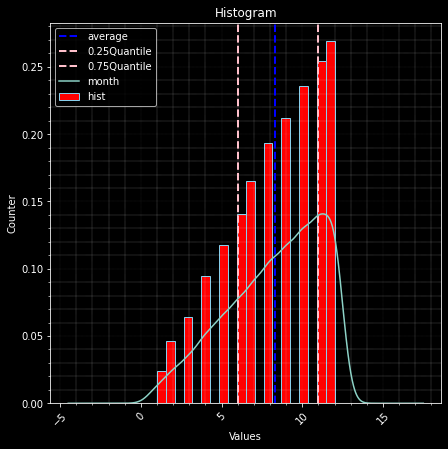

In [73]:
custom_hist(df['month'])

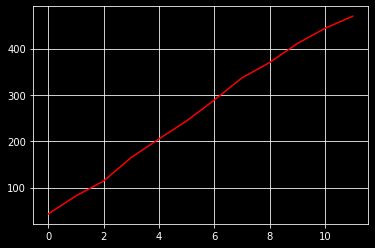

In [74]:
df.groupby('month')['calls_count'].agg(['count']).reset_index().sort_values('count', ascending = False)['count'].plot(color = 'red', grid = True)

In [75]:
# calls_count

In [76]:
describe_columns(df['calls_count'])

Количество пропусков : 0.012445550715619166
Тип данных : float64
Количество уникальных элементов : 223


In [77]:
df.loc[df['calls_count'].isnull()][:3]

,user_id,date,calls_count,minutes,sum_gb,count,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
934,1476,2018-04-01,NaN,NaN,0.0,NaN,50,0,Москва,Валентина,...,2018-04-30,ultra,1000,30720,3000,1950,150,1,1,4
952,1091,2018-05-01,NaN,NaN,10.0,30.0,36,0,Набережные Челны,Вера,...,2018-05-08,ultra,1000,30720,3000,1950,150,1,1,5
953,1091,2018-06-01,NaN,NaN,9.0,30.0,36,0,Набережные Челны,Вера,...,2018-05-08,ultra,1000,30720,3000,1950,150,1,1,6


In [78]:
df['calls_count'] = df['calls_count'].fillna(0)

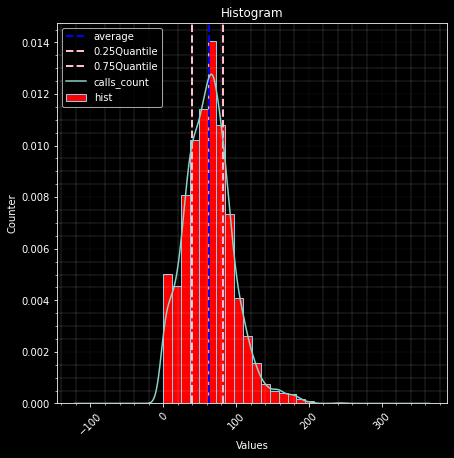

In [79]:
custom_hist(df['calls_count'])

In [80]:
df['calls_count'].describe(include = 'all')

count    3214.000000
mean       63.038892
std        33.236368
min         0.000000
25%        40.000000
50%        62.000000
75%        82.000000
max       244.000000
Name: calls_count, dtype: float64

In [81]:
df['calls_count'] = df['calls_count'].astype('int64')

In [82]:
# minutes

In [83]:
describe_columns(df['minutes'])

Количество пропусков : 0.012445550715619166
Тип данных : float64
Количество уникальных элементов : 965


In [84]:
df['minutes'] = df['minutes'].fillna(0)

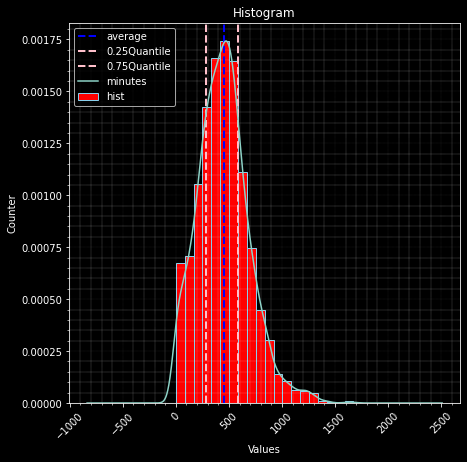

In [85]:
custom_hist(df['minutes'])

In [86]:
df['minutes'] = df['minutes'].astype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


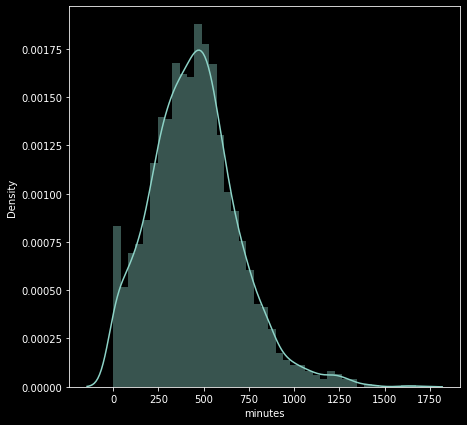

In [87]:
plt.figure(figsize = (7, 7))
sns.distplot(df['minutes'])
plt.show();

In [88]:
scipy.stats.shapiro(df['minutes'])

(0.9768468141555786, 1.8240040588342787e-22)

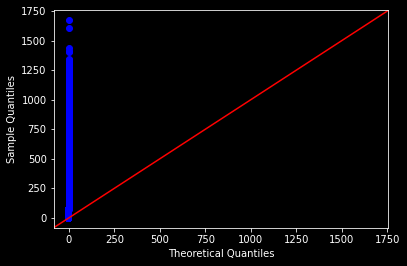

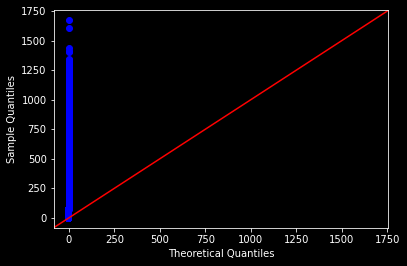

In [89]:
sm.qqplot(df['minutes'], line = '45')

In [90]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9


In [91]:
# sum_gb

In [92]:
describe_columns(df['sum_gb'])

Количество пропусков : 0.003422526446795271
Тип данных : float64
Количество уникальных элементов : 58


In [93]:
df.loc[df['sum_gb'].isnull()][:2]

,user_id,date,calls_count,minutes,sum_gb,count,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
451,1273,2018-05-01,24,220,NaN,21.0,46,0,Курган,Рэм,...,2018-05-15,ultra,1000,30720,3000,1950,150,1,1,5
452,1273,2018-06-01,40,230,NaN,38.0,46,0,Курган,Рэм,...,2018-05-15,ultra,1000,30720,3000,1950,150,1,1,6


In [94]:
df['sum_gb'] = df['sum_gb'].fillna(0)

In [95]:
df['sum_gb'].describe(include = 'all')

count    3214.000000
mean       16.303049
std         7.391393
min         0.000000
25%        12.000000
50%        16.000000
75%        20.000000
max        48.000000
Name: sum_gb, dtype: float64

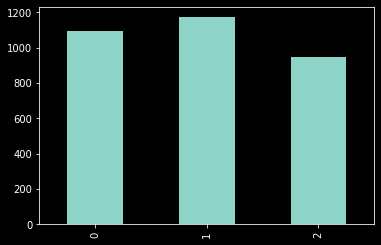

In [96]:
df['intervals'] = pd.qcut(df['sum_gb'], 3, labels = ['bad', 'med', 'high'])
df.groupby('intervals')['sum_gb'].agg(['count']).reset_index()['count'].plot(kind = 'bar')

In [97]:
df = df.drop(['intervals'], axis = 1)

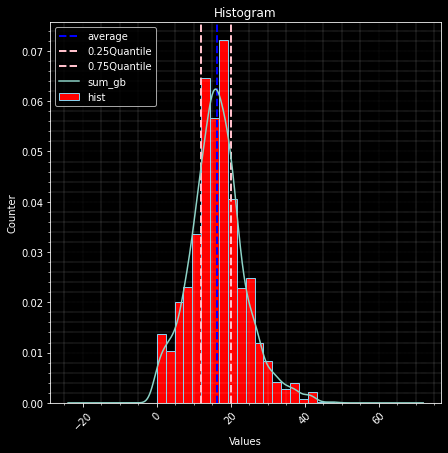

In [98]:
custom_hist(df['sum_gb'])

In [99]:
scipy.stats.shapiro(df['sum_gb'])

(0.9817705750465393, 6.398227820930891e-20)

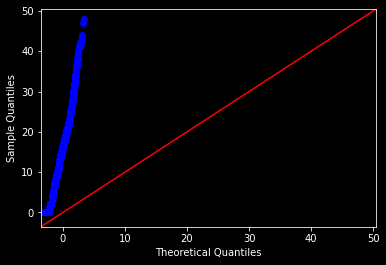

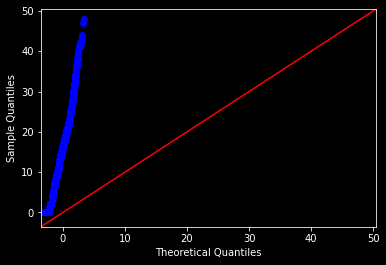

In [100]:
sm.qqplot(df['sum_gb'], line = '45')

In [101]:
print(np.quantile(df['sum_gb'], 0.99))

38.0


In [102]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9


In [103]:
df.columns = ['user_id', 'date', 'calls_count', 'minutes', 'sum_gb', 'count_messages', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff_name', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'month']

In [104]:
# count_messages

In [105]:
describe_columns(df['count_messages'])

Количество пропусков : 0.15463596764156815
Тип данных : float64
Количество уникальных элементов : 676


In [106]:
df['count_messages'] = df['count_messages'].fillna(0)

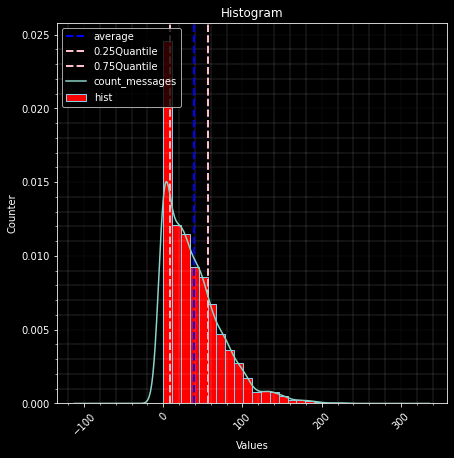

In [107]:
custom_hist(df['count_messages'])

In [108]:
np.quantile(df['count_messages'], 0.99)

154.8699999999999

In [109]:
# age

In [110]:
describe_columns(df['age'])

Количество пропусков : 0.0
Тип данных : int64
Количество уникальных элементов : 58


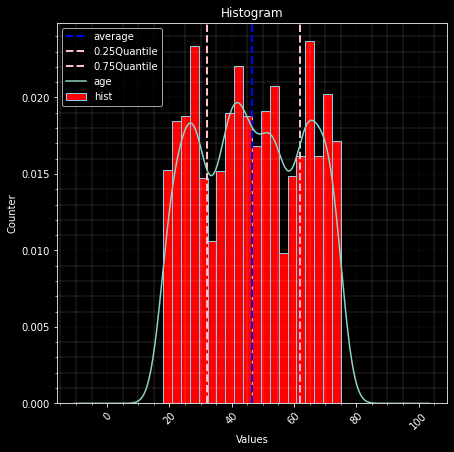

In [111]:
custom_hist(df['age'])

In [112]:
df.groupby('age')['date'].agg(['count']).reset_index().sort_values('count', ascending = False)[:5]

,age,count
35,53,107
53,71,106
24,42,97
46,64,97
11,29,80


In [113]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9


In [114]:
# churn_date


In [115]:
pd.set_option('display.max_columns', 22)

In [116]:
describe_columns(df['churn_date'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов : 32


In [117]:
df['churn_date'].value_counts()[:5]

0                      3027
2018-10-14 00:00:00      13
2018-12-09 00:00:00      12
2018-12-26 00:00:00      10
2018-10-03 00:00:00      10
Name: churn_date, dtype: int64

In [118]:
df.loc[df['churn_date'] != 0].groupby('churn_date')['date'].agg(['count']).sort_values('count', ascending = False).reset_index()[:10]

,churn_date,count
0,2018-10-14,13
1,2018-12-09,12
2,2018-12-26,10
3,2018-10-03,10
4,2018-10-27,9
5,2018-12-11,9
6,2018-12-03,8
7,2018-11-26,8
8,2018-08-31,8
9,2018-08-17,8


In [119]:
# city


In [120]:
describe_columns(df['city'])

Количество пропусков : 0.0
Тип данных : object
Количество уникальных элементов : 76


In [121]:
df.groupby('city')['date'].agg(['count']).sort_values('count', ascending = False).reset_index()[:5] # top 5 gorodov

,city,count
0,Москва,611
1,Санкт-Петербург,270
2,Новосибирск,98
3,Уфа,95
4,Краснодар,86


In [122]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9


In [123]:
# reg_date

In [124]:
describe_columns(df['reg_date'])

Количество пропусков : 0.0
Тип данных : datetime64[ns]
Количество уникальных элементов : 269


In [125]:
df.groupby('tariff_name').agg(['count']).reset_index() # Выборки не равного размера

,tariff_name,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
,,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
0,smart,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229
1,ultra,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985


# Проверка гипотез

**Гипотеза один: FirstH --> среднее количество потраченных минут у тарифоф Smart and ultra одинаковы**

H0) Пусть они будут равны
H1) Скорее всего равны они не будут
alpha = 0.01

In [126]:
smart = df.loc[df['tariff_name'] == 'smart']
ultra = df.loc[df['tariff_name'] == 'ultra']

In [127]:
def two_histograms(df1 : pd.Series, df2 : pd.Series):
  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_subplot()
  plt.hist(df1, color = 'blue', edgecolor = 'red', bins = 20, alpha = 0.5, label = 'firstDF')
  plt.hist(df2, color = 'orange', edgecolor = 'white', bins = 20, alpha = 0.8, label = 'secondDF')
  plt.axvline(df1.mean(), color = 'skyblue', linewidth = 2, linestyle = 'dashed', label = 'AVG first df')
  plt.axvline(df2.mean(), color = 'red', linewidth = 2, linestyle = 'dashed', label = 'AVG second df')
  plt.title('Two histogrmas')
  plt.xticks(rotation = 45)
  plt.minorticks_on()
  plt.legend(loc = 'upper left')
  plt.grid(which = 'minor', ls = '--', linewidth = 0.2)
  plt.grid(which = 'major', ls = ':', linewidth = 0.2)
  plt.show();



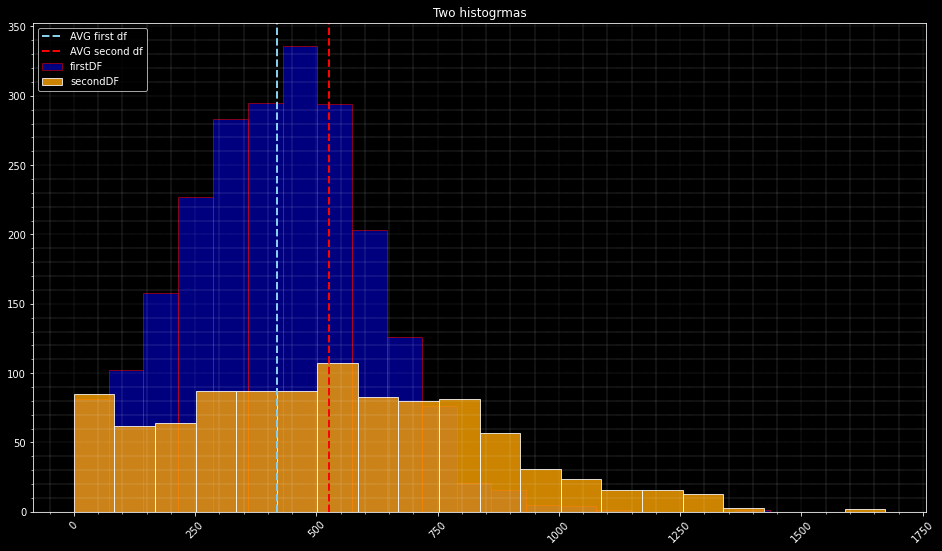

In [128]:
two_histograms(smart['minutes'], ultra['minutes'])

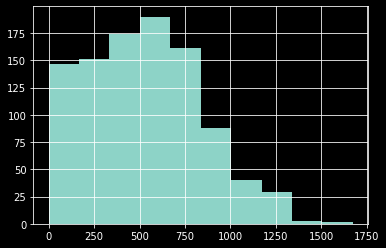

In [129]:
ultra['minutes'].hist(grid = True) # Распределние не является нормальным

In [130]:
table, pvalue = scipy.stats.shapiro(ultra['minutes'])
pvalue > 0.01

False

In [131]:
table, pvalue = scipy.stats.shapiro(smart['minutes'])
pvalue > 0.01


False

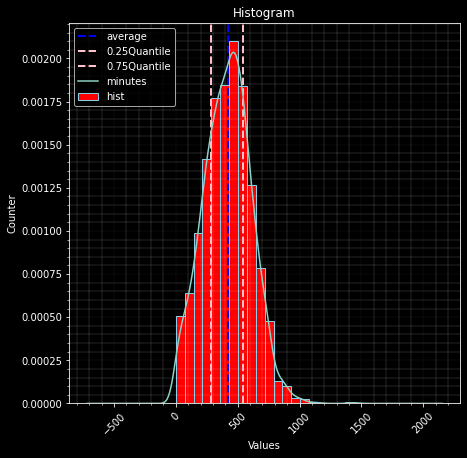

In [132]:
custom_hist(smart['minutes'])

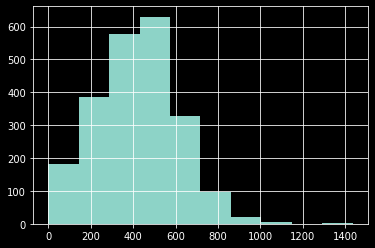

In [133]:
smart['minutes'].hist(grid = True) # +- normalize

In [134]:
# no ttest ind

In [135]:
# check thew vars

In [136]:
statistic, pvalue = scipy.stats.levene(smart['minutes'], ultra['minutes'])
pvalue >= 0.01

False

In [137]:
statistic, pvalue = scipy.stats.fligner(smart['minutes'], ultra['minutes'])
pvalue >= 0.01

False

In [138]:
stats, pvalue = scipy.stats.mannwhitneyu(smart['minutes'], ultra['minutes'])

In [139]:
if pvalue >= 0.01:
  print(f'Не отвергаем нулевую гипотезу')
else:
  print(f'Oтвергаем нулевую гипотезу')


Oтвергаем нулевую гипотезу


**Средний возраст пользователей смарт выше чем у ультра*

H0) Средний возраст никак не отличается между двумя выборками
H1) Средний возраст имеет статистически значимые отличия

In [140]:
alpha = 0.01

In [141]:
smart = df.loc[df['tariff_name'] == 'smart']
ultra = df.loc[df['tariff_name'] == 'ultra']

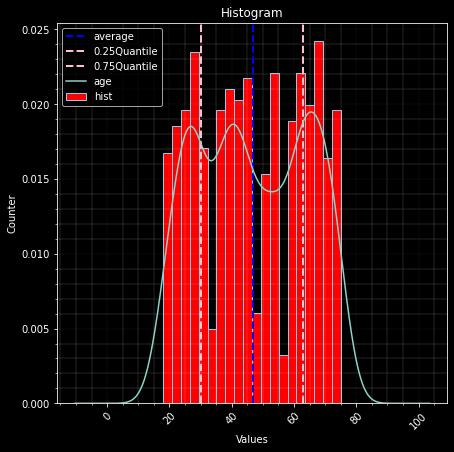

In [142]:
custom_hist(ultra['age'])

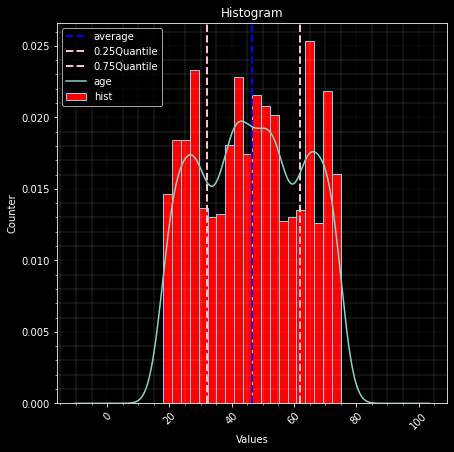

In [143]:
custom_hist(smart['age'])

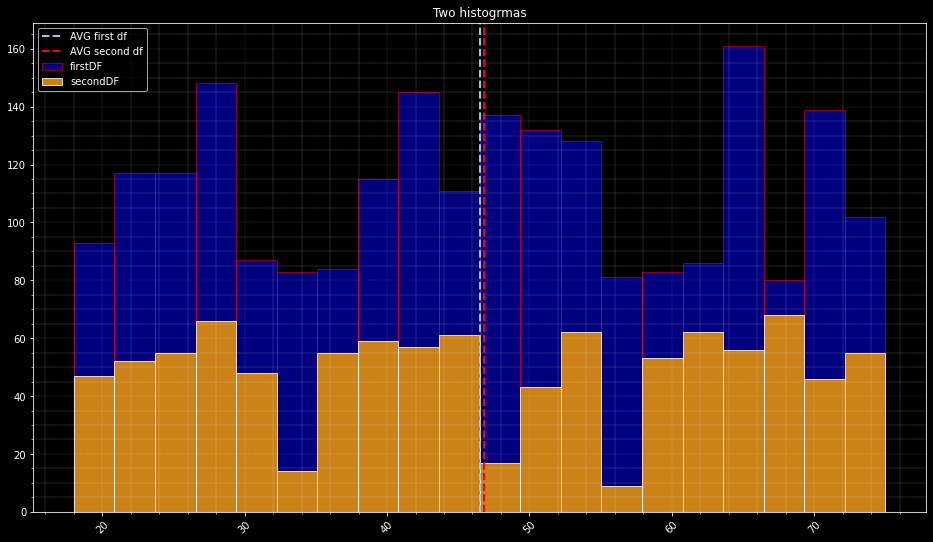

In [144]:
two_histograms(smart['age'], ultra['age'])

In [145]:
# ttest uletaet

In [146]:
scipy.stats.levene(smart['age'], ultra['age']).pvalue > 0.001 # vars +- equal

True

In [147]:
scipy.stats.fligner(smart['age'], ultra['age']).pvalue > 0.001 # vars +- equal

False

In [148]:
# Проведем снова тест мановитней и после чего сделаем все бутстрепом

In [149]:
table, pvalue = scipy.stats.mannwhitneyu(smart['age'], ultra['age'])
if pvalue >= alpha:
  print('Нет оснований отвергать нулевую гипотезу - то есть фактически средний возраст будет равен по всем ГС')
else:
  print('Отвергаем нулевую гипотезу')

Нет оснований отвергать нулевую гипотезу - то есть фактически средний возраст будет равен по всем ГС


In [150]:
def create_bootstrap(smart : pd.Series, ultra : pd.Series):
  arr_smart = pd.Series([smart.sample(len(smart) // 2).mean() for _ in range(1000)])
  ultra_smart = pd.Series([ultra.sample(len(ultra) // 2).mean() for _ in range(1000)])
  stack_answer = arr_smart - ultra_smart
  return pd.Series(stack_answer)


In [151]:
arr = create_bootstrap(smart['age'], ultra['age'])
arr.describe()

count    1000.000000
mean       -0.283615
std         0.635612
min        -2.146050
25%        -0.713223
50%        -0.296578
75%         0.151148
max         1.464892
dtype: float64

In [152]:
std = np.std(arr, ddof = 1)
left = np.mean(arr) - 2 * std
right = np.mean(arr) + 2 * std

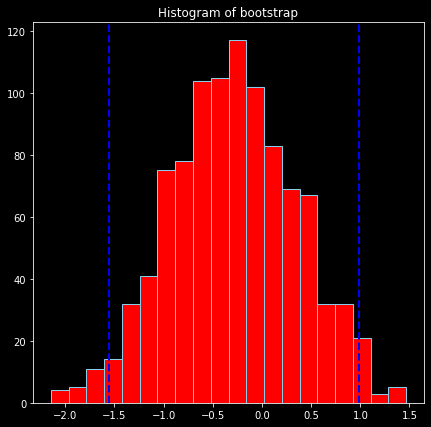

In [153]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(arr, color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(left, color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.axvline(right, color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.title('Histogram of bootstrap')
plt.show();

In [154]:
# Таким путем мы подтверидили о том что скорее всего значения статистически не значимы - то есть средний возраст равен и путем бутстрепа - сделаем тоже самое еще раз

In [155]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9


In [156]:
static, pvalue = scipy.stats.ttest_ind(ultra['age'], smart['age'])
pvalue > alpha

True

# Предобработка V2.0

**Выручка с каждого пользователя - для дальнейших тестов**

In [157]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9


In [158]:
df['bool_minutes'] = df['minutes'] > df['minutes_included']
df.loc[df['bool_minutes'] == True, 'bool_minutes'] = (df['minutes'] - df['minutes_included']) * df['rub_per_minute']
df.loc[df['bool_minutes'] == False, 'bool_minutes'] = np.nan
df['bool_minutes'] = df['bool_minutes'].fillna(0)

In [159]:
df['mb_per_month_included'] = df['mb_per_month_included'].apply(lambda x: x // 1024)

In [160]:
df['bool_gb'] = (df['mb_per_month_included'] < df['sum_gb'])
df.loc[df['bool_gb'] == True, 'bool_gb'] = (df['sum_gb'] - df['mb_per_month_included']) * df['rub_per_gb']
df.loc[df['bool_gb'] == False, 'bool_gb'] = np.nan
df['bool_gb'] = df['bool_gb'].fillna(0)

In [161]:
df['bool_messages'] = (df['messages_included'] < df['count_messages'])
df.loc[df['bool_messages'] == True, 'bool_messages'] = (df['count_messages'] - df['messages_included']) * df['rub_per_message']
df.loc[df['bool_messages'] == False, 'bool_messages'] = np.nan
df['bool_messages'] = df['bool_messages'].fillna(0)

In [162]:
df['last_price'] = df['bool_gb'] + df['bool_messages'] + df['bool_minutes'] + df['rub_monthly_fee']
df['last_price'] = df['last_price'].astype('int64')

In [163]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,bool_minutes,bool_gb,bool_messages,last_price
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,5,0,0.0,0.0,1950
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,6,0,0.0,0.0,1950
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,7,0,0.0,0.0,1950
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,8,0,0.0,0.0,1950
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,9,0,0.0,0.0,1950


In [164]:
df['intervals'] = pd.qcut(df['last_price'], 3 , labels = ['cheap', 'med', 'expensive'], duplicates = 'drop')
df.groupby('intervals')['last_price'].agg(['count', 'sum']).reset_index().sort_values(by = 'sum', ascending = False)

,intervals,count,sum
1,med,1704,2814355
2,expensive,438,1168614
0,cheap,1072,650582


In [165]:
df = df.drop(['bool_minutes', 'bool_gb', 'bool_messages', 'intervals'], axis = 1)

In [166]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,last_price
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,5,1950
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,6,1950
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,7,1950
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,8,1950
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,9,1950


In [167]:
stack_for_corr = ['calls_count', 'minutes', 'sum_gb', 'count_messages','age']

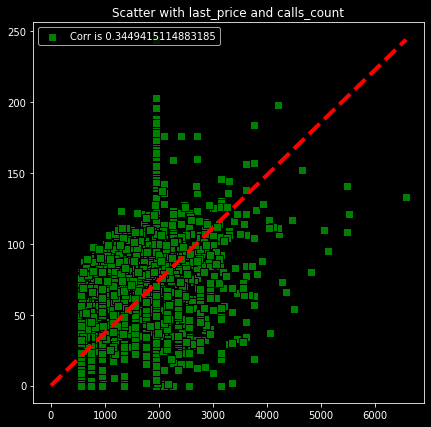

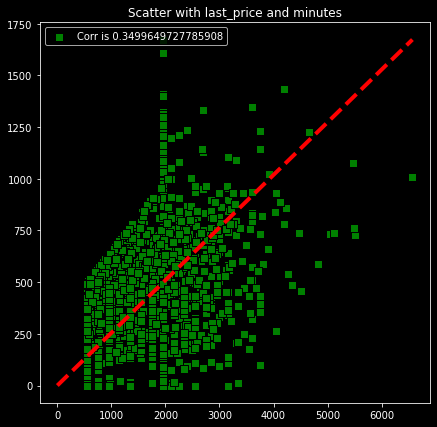

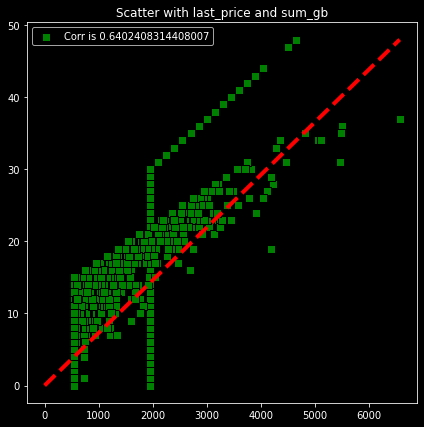

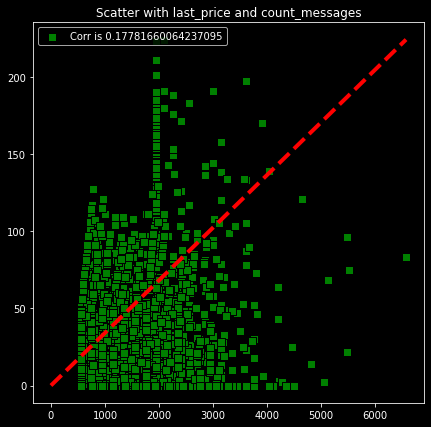

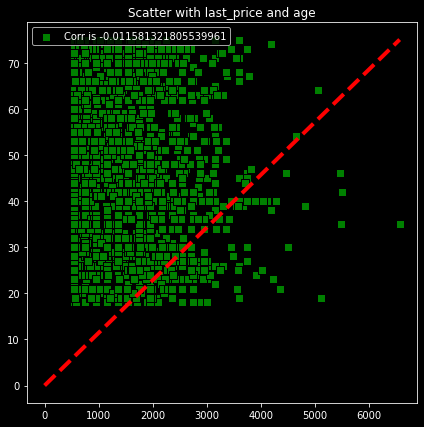

In [168]:
for correletaion in stack_for_corr:
  fig = plt.figure(figsize = (7, 7))
  ax = fig.add_subplot()
  cor = df['last_price'].corr(df[correletaion])
  plt.scatter(df['last_price'], df[correletaion], s = 50, c = 'g', edgecolor = 'black', marker = 's', label = f'Corr is {cor}')
  ax.plot([0, max(df['last_price'])], [0, max(df[correletaion])], ls="--", linewidth = 4, color = 'red')
  plt.title(f'Scatter with last_price and {correletaion}')
  plt.legend(loc = 'upper left')
  plt.show();

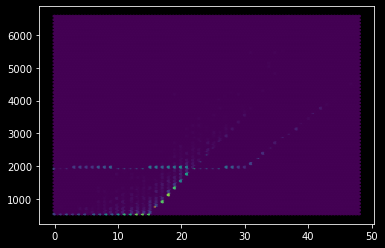

In [169]:
plt.hexbin(df['sum_gb'], df['last_price'], alpha = 5)

# Проверка гипотез 2: <> -> Средняя пользовательская выручка тарифа ультра выше чем у смарт 

H0) - Пусть средние выручки пользователей этих тарифов будут равны
H1) - Средние пользовательские выручки не будут равны

In [170]:
smart = df.loc[df['tariff_name'] == 'smart']
ultra = df.loc[df['tariff_name'] == 'ultra']

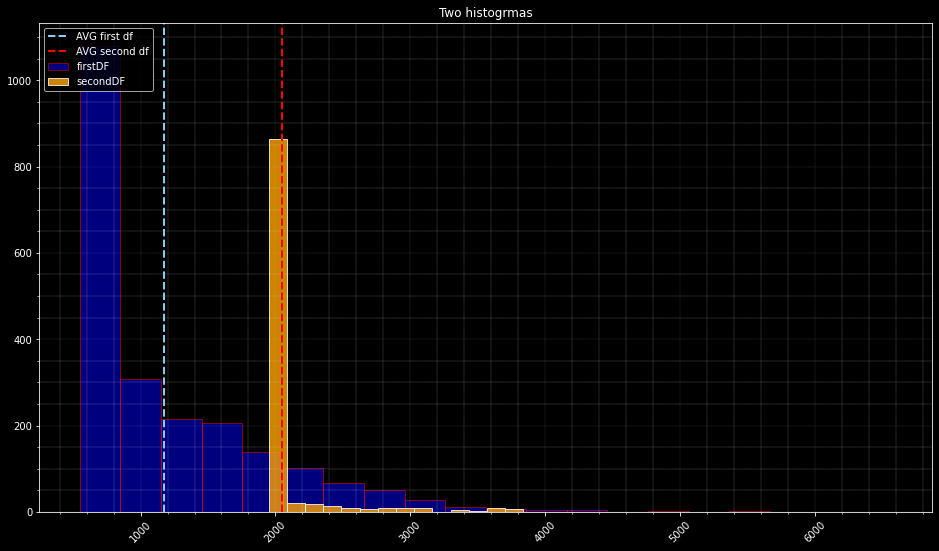

In [171]:
two_histograms(smart['last_price'], ultra['last_price']) # Очевидно без ttest)- распределение пуасонское - совсем нет гаусовского

In [172]:
table, pvalue = scipy.stats.shapiro(smart['last_price'])
pvalue > 0.01

False

In [173]:
table, pvalue = scipy.stats.shapiro(ultra['last_price'])
pvalue > 0.01

False

In [174]:
statistics, pvalue = scipy.stats.levene(smart['last_price'], ultra['last_price'])
pvalue > 0.01

False

In [175]:
statistics, pvalue = scipy.stats.fligner(smart['last_price'], ultra['last_price'])
pvalue > 0.01

False

In [176]:
scipy.stats.mannwhitneyu(smart['last_price'], ultra['last_price']).pvalue > 0.01

False

In [177]:
def create_bootstrap_for_price(smart : pd.Series, ultra : pd.Series):
  left = pd.Series([smart.sample(len(smart) // 2).mean() for _ in range(10 ** 3)])
  right = pd.Series([ultra.sample(len(ultra) // 2).mean() for _ in range(10 ** 3)])
  return left - right

In [178]:
arr = create_bootstrap_for_price(smart['last_price'], ultra['last_price'])

In [179]:
std = np.std(arr, ddof = 1)
left = np.mean(arr) - 2 * std
right = np.mean(arr) + 2 * std

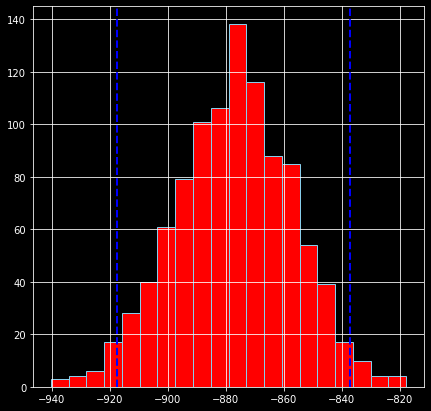

In [180]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(arr, color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(left, color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.axvline(right, color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.grid()
plt.show();

**Средняя выручка пользователей Москвы выше чем у СБ**
H0) -> Средняя выручка Москвы и СБ равна
H1) -> Средняя выручка Москвы и СБ не равна

In [181]:
moscow = df.loc[df['city'] == 'Москва']
sb = df.loc[df['city'] == 'Санкт-Петербург']

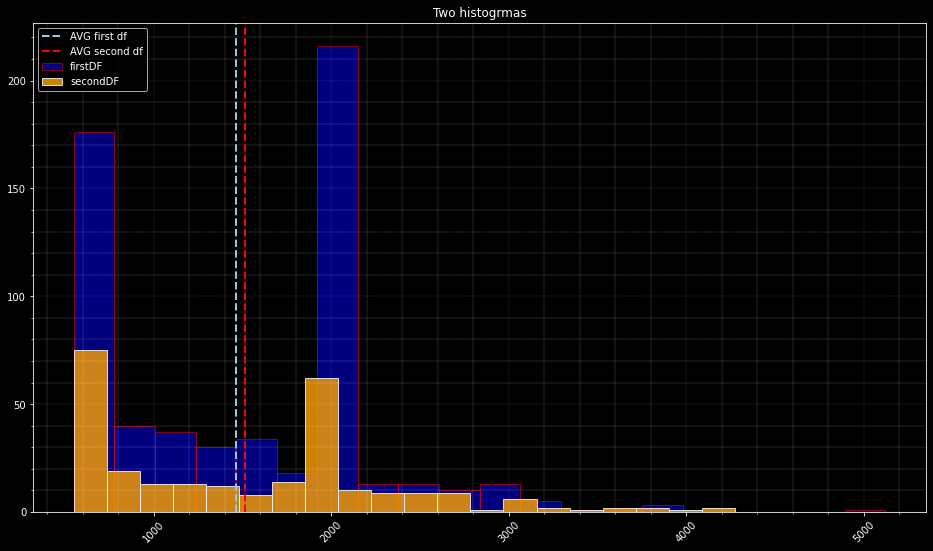

In [182]:
two_histograms(moscow['last_price'], sb['last_price']) # Данное распределние никак не починить - ttest otletaet

In [183]:
tested, pvalue = scipy.stats.shapiro(moscow['last_price'])
pvalue > 0.01

False

In [184]:
tested, pvalue = scipy.stats.shapiro(sb['last_price'])
pvalue > 0.01

False

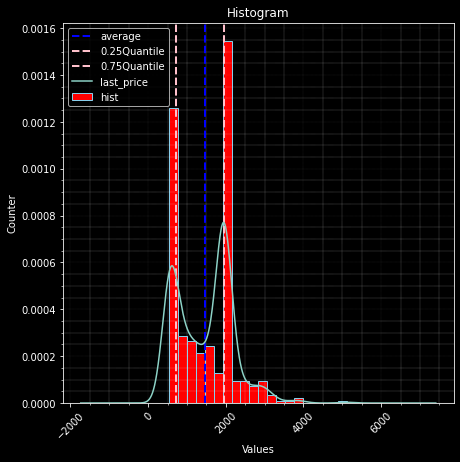

In [185]:
custom_hist(moscow['last_price'])

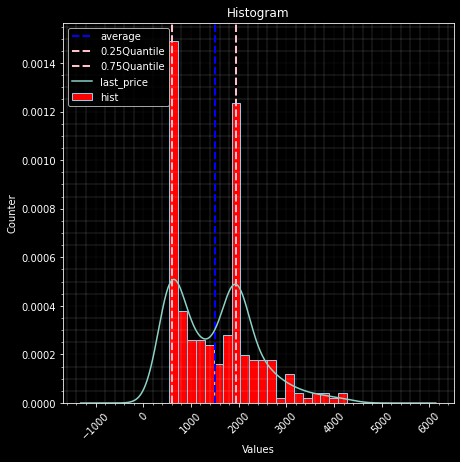

In [186]:
custom_hist(sb['last_price'])

In [187]:
variance_moscow = np.var(moscow['last_price'])
variance_sb = np.var(sb['last_price'])

abs(variance_moscow - variance_sb)

182008.8317982409

In [188]:
statistics, pvalue = scipy.stats.fligner(moscow['last_price'], sb['last_price'])
pvalue > 0.01

True

In [189]:
scipy.stats.mannwhitneyu(moscow['last_price'], sb['last_price']).pvalue > 0.01

True

In [190]:
statistic, pvalue = scipy.stats.mannwhitneyu(moscow['last_price'], sb['last_price'])

if pvalue > alpha:
  print('Нет причин отвергать нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

Нет причин отвергать нулевую гипотезу


In [191]:
statistic, pvalue = scipy.stats.ttest_ind(moscow['last_price'], sb['last_price'], equal_var = False)
 # потому что распределение не является нормальным
if pvalue > alpha:
  print('Нет причин отвергать нулевую гипотезу')
else:
  print('Отвергаем нулевую гипотезу')

Нет причин отвергать нулевую гипотезу


In [192]:
def create_bootstrap_for_last_price(smart : pd.Series, ultra : pd.Series):
  left = pd.Series([smart.sample(len(smart) // 5).mean() for _ in range(10 ** 3)])
  right = pd.Series([ultra.sample(len(ultra) // 5).mean() for _ in range(10 ** 3)])
  return left - right

In [193]:
arr = create_bootstrap_for_last_price(moscow['last_price'], sb['last_price'])

In [194]:
left = np.mean(arr) - 2 * np.std(arr)
right = np.mean(arr) + 2 * np.std(arr)

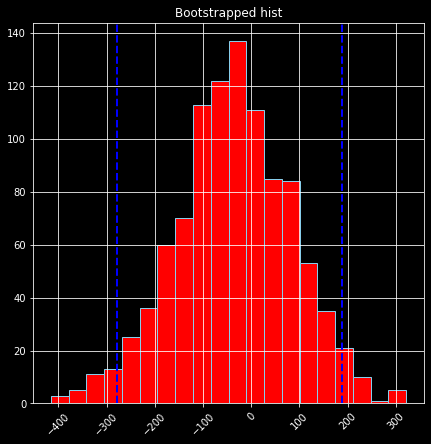

In [195]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(arr, color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(np.quantile(arr, 0.025), color = 'blue', label = 'left limit', linewidth = 2, linestyle = 'dashed')
plt.axvline(np.quantile(arr, 0.975), color = 'blue', label = 'right limit', linewidth = 2, linestyle = 'dashed')
plt.title('Bootstrapped hist')
plt.xticks(rotation = 45)
plt.grid()
plt.show();

**Second bootstrapped test**

In [196]:
first_col = moscow['last_price'].values
second_col = sb['last_price'].values

In [197]:
boot_results = bs.bootstrap_ab(first_col, second_col, stat_func = bs_stats.mean, compare_func = bs_compare.difference,
                               return_distribution = True)

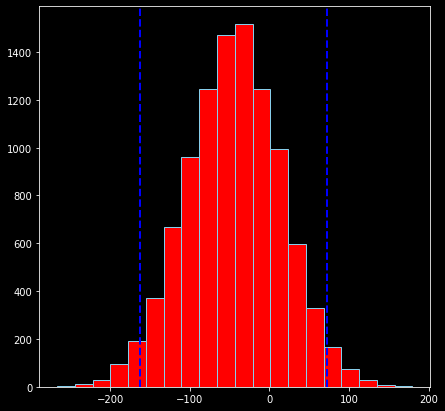

In [198]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(boot_results, color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(np.quantile(boot_results, 0.025), color = 'blue', label = 'left limit', linewidth = 2, linestyle = 'dashed')
plt.axvline(np.quantile(boot_results, 0.975), color = 'blue', label = 'right limit', linewidth = 2, linestyle = 'dashed')
plt.show();

In [199]:
arr = bs.bootstrap(np.array(moscow['last_price']), stat_func = bs_stats.mean, return_distribution = True)
arr

array([1474.3502455 , 1462.56301146, 1478.28477905, ..., 1445.68739771,
       1449.97217676, 1449.52864157])

In [200]:
boot_results = bs.bootstrap_ab(first_col, second_col, stat_func = bs_stats.mean, compare_func = bs_compare.percent_difference,
                               return_distribution = True)
boot_results

array([-7.66988518, -6.50313231,  3.34069693, ...,  1.00676466,
       -0.82710823,  0.43033725])

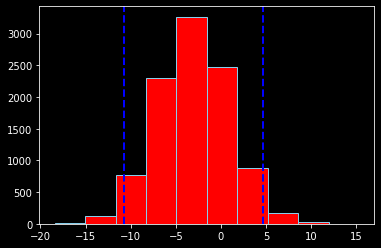

In [201]:
plt.hist(boot_results, color = 'red', edgecolor = 'skyblue')
plt.axvline(np.quantile(boot_results, 0.025), color = 'blue', label = 'left limit', linewidth = 2, linestyle = 'dashed')
plt.axvline(np.quantile(boot_results, 0.975), color = 'blue', label = 'right limit', linewidth = 2, linestyle = 'dashed')

In [202]:
import random as rn
def generate_bootstrap(first_col : pd.Series, second_col : pd.Series):

  length_first_col = first_col.shape[0]
  length_second_col = second_col.shape[0]
  first_col = list(first_col)
  second_col = list(second_col)
  result_stack = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_first_col // 2):
      random = rn.randint(0, length_first_col - 1)
      stack += [first_col[random]]
    
    stack = pd.Series(stack)
    result_stack += [stack.mean()]

  second_result = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_second_col // 2):
      random = rn.randint(0, length_second_col - 1)
      stack += [second_col[random]]
    
    stack = pd.Series(stack)
    second_result += [stack.mean()]
  return pd.Series(result_stack) - pd.Series(second_result)
    

In [203]:
arr = generate_bootstrap(moscow['last_price'], sb['last_price'])

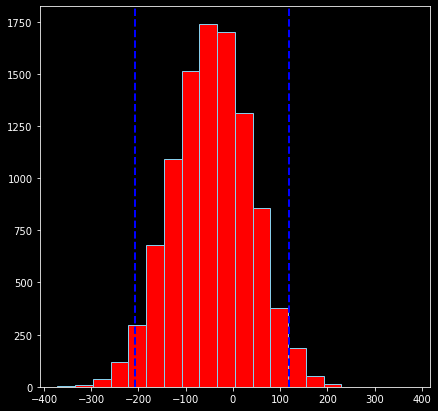

In [204]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(arr, color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(np.quantile(arr, 0.025), color = 'blue', label = 'left limit', linewidth = 2, linestyle = 'dashed')
plt.axvline(np.quantile(arr, 0.975), color = 'blue', label = 'right limit', linewidth = 2, linestyle = 'dashed')
plt.show();

**Bootspapped, itertools - product**


[Itertools DOCK](https://docs.python.org/3/library/itertools.html)

***25ые процентили у Москвы и СБ сильно отличаются***

H0) -> У Москвы и СБ статистически незначимая разница в процентилях
H1) -> Есть статистическая значимость между Москвой и СБ

In [205]:
df.head()

,user_id,date,calls_count,minutes,sum_gb,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,last_price
0,1000,2018-05-01,22,159,2.0,22.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,5,1950
1,1000,2018-06-01,43,172,22.0,60.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,6,1950
2,1000,2018-07-01,47,340,13.0,75.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,7,1950
3,1000,2018-08-01,52,408,13.0,81.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,8,1950
4,1000,2018-09-01,58,466,14.0,57.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,9,1950


In [206]:
moscow = df.loc[df['city'] == 'Москва']
sb = df.loc[df['city'] == 'Санкт-Петербург']

In [207]:

def generate_bootstrap(first_col : pd.Series, second_col : pd.Series):

  length_first_col = first_col.shape[0]
  length_second_col = second_col.shape[0]
  first_col = list(first_col)
  second_col = list(second_col)
  result_stack = []
  for _ in range(10 ** 3):
    stack = []
    for _ in range(length_first_col // 2):
      random = rn.randint(0, length_first_col - 1)
      stack += [first_col[random]]
    
    stack = pd.Series(stack)
    result_stack += [np.quantile(np.array(stack), 0.25)]

  second_result = []
  for _ in range(10 ** 3):
    stack = []
    for _ in range(length_second_col // 2):
      random = rn.randint(0, length_second_col - 1)
      stack += [second_col[random]]
    
    stack = pd.Series(stack)
    second_result += [np.quantile(np.array(stack), 0.25)]
  return pd.Series(result_stack) - pd.Series(second_result)
    

In [208]:
import random as rn
def generate_bootstrap_mean(first_col : pd.Series, second_col : pd.Series):

  length_first_col = first_col.shape[0]
  length_second_col = second_col.shape[0]
  first_col = list(first_col)
  second_col = list(second_col)
  result_stack = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_first_col // 2):
      random = rn.randint(0, length_first_col - 1)
      stack += [first_col[random]]
    
    stack = pd.Series(stack)
    result_stack += [stack.mean()]

  second_result = []
  for _ in range(10 ** 4):
    stack = []
    for _ in range(length_second_col // 2):
      random = rn.randint(0, length_second_col - 1)
      stack += [second_col[random]]
    
    stack = pd.Series(stack)
    second_result += [stack.mean()]
  return pd.Series(result_stack) - pd.Series(second_result)
    

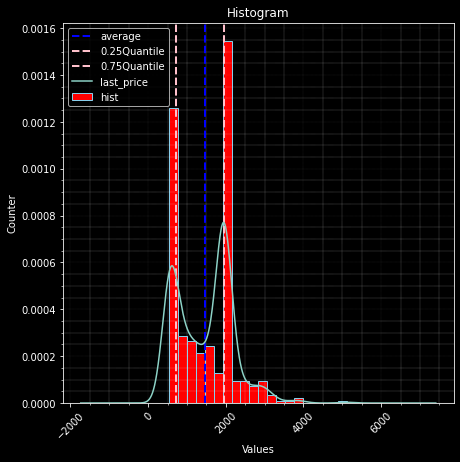

In [209]:
custom_hist(moscow['last_price']) # Бимодальное распределние - ttest не подойдет

In [210]:
test, pvalue = scipy.stats.shapiro(moscow['last_price'])
pvalue >= 0.01

False

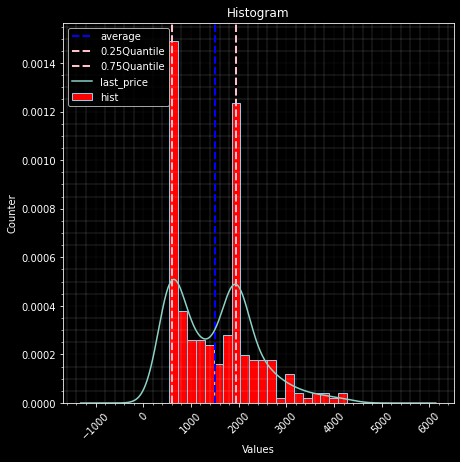

In [211]:
custom_hist(sb['last_price']) # Тоже самое

In [212]:
pvalue = scipy.stats.shapiro(sb['last_price'])[1]
pvalue > 0.01

False

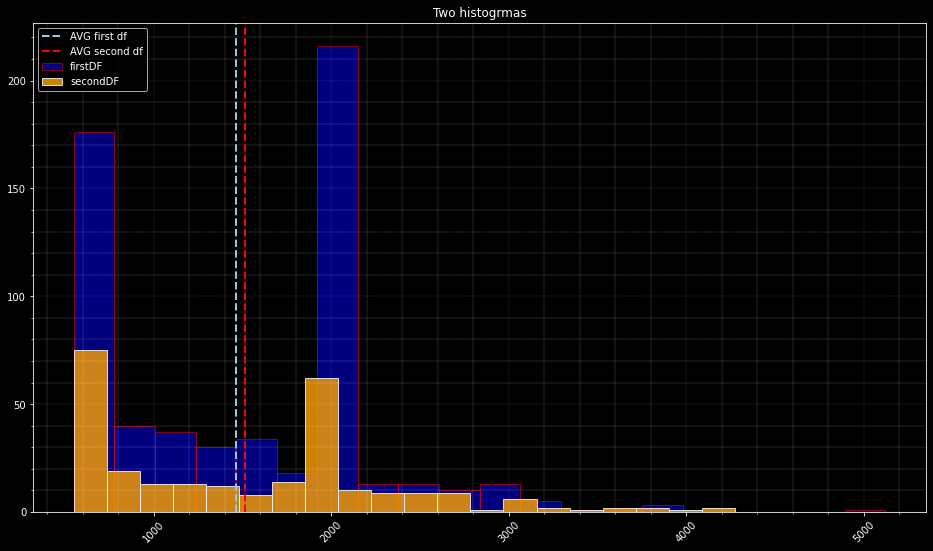

In [213]:
two_histograms(moscow['last_price'], sb['last_price'])

In [214]:
# Вызываем функцию заточеную под бутстреп квантилей

In [215]:
arr = generate_bootstrap_mean(moscow['last_price'], sb['last_price'])

In [216]:
left = np.mean(arr) - 2 * np.std(arr)
right = np.mean(arr) + 2 * np.std(arr)

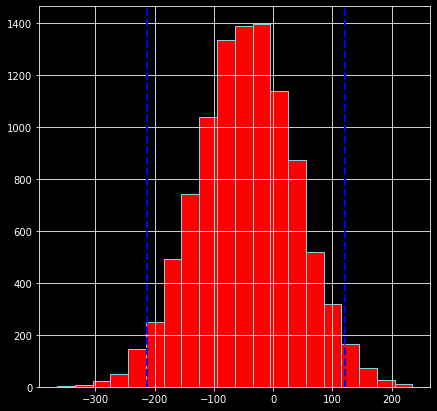

In [217]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(arr,  color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(left, linestyle = 'dashed', color = 'blue', linewidth = 2)
plt.axvline(right, linestyle = 'dashed', color = 'blue', linewidth = 2)
plt.grid()
plt.show()

In [218]:
stats, pvalue = scipy.stats.mannwhitneyu(moscow['last_price'], sb['last_price'])
if pvalue > alpha:
  print(f'Нет смысла отвергать нулевую гипотезу')
else:
  print(f'Отвергаем нулевую гипотезу')

Нет смысла отвергать нулевую гипотезу


In [219]:
result = bs.bootstrap_ab(moscow['last_price'].values, sb['last_price'].values, stat_func = bs_stats.mean, compare_func = bs_compare.difference, return_distribution = True)

In [220]:
result

array([-131.05317937,  -59.99464751,   63.88715524, ...,   12.60324908,
        -34.69899376,  -59.28346366])

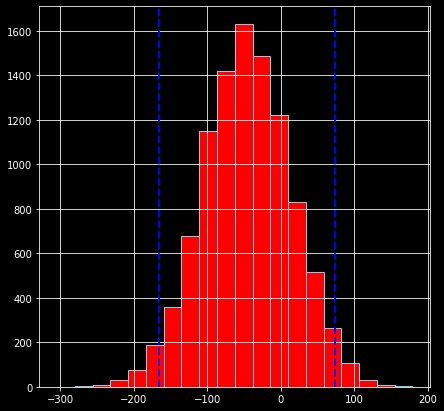

In [221]:
left = np.mean(result) - 2 * np.std(result)
right = np.mean(result) + 2 * np.std(result)
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot()
plt.hist(result,  color = 'red', edgecolor = 'skyblue', bins = 20)
plt.axvline(left, linestyle = 'dashed', color = 'blue', linewidth = 2)
plt.axvline(right, linestyle = 'dashed', color = 'blue', linewidth = 2)
plt.grid()
plt.show()